[課題のURL](https://diver.diveintocode.jp/curriculums/1644)

In [4]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Sprint機械学習スクラッチ ロジスティック回帰

# 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。  

$h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}.$

~~~
def _hypothesis(self, X, theta):
        """
        仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features) 訓練データ
        
        Returns
        -------
          次の形のndarray, shape (n_samples, 1) 線形の仮定関数による推定結果
        """
        def g(z):
            # シグモイド関数
            return 1.0 / (1.0 + np.exp(-z))
        
        # シグモイド関数に適応する。
        h = np.dot(X, theta)
        
        return g(h)
~~~

# 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。  
以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、  
fitメソッドから呼び出すようにしてください。  

$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\<br/>\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\<br/>\frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1$

参考:線形回帰

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$

~~~

    def _gradient_descent(self, X, y, theta):
        """
        最急降下法により、θの値を求める
        X : 次の形のndarray, shape (n_samples, n_features) 訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, ) 訓練データの正解値
        """
        m = X.shape[0] # データ数
        j = X.shape[1] # 特徴量数(bを含む)
        alpha = self.lr
        lam = self.lam
        h = self._hypothesis(X, theta)
        error = h-y.reshape(m,)
        
        # J>=1の場合
        theta = theta - alpha*(1/m)*np.dot(X.T,error) + (lam/m)*theta
        
        # j=0の場合,正則化項不要なので上書き
        theta[0] = theta[0] - (lam/m)*theta[0]
        
        return  theta
~~~

# 【問題3】推定

推定する仕組みを実装してください。  
ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 $h_\theta(x)$ の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

~~~
def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X_test = sm.add_constant(X_test) #最初の列に1を加える
        y_pred = self._linear_hypothesis(X_test, self.coef_)
        
        return y_pred

    def predict(self, X_test):
        """
        ロジスティック回帰を使いラベルを推定する。
        →最終的なパラメータを利用し、検証データ(X_test)から予測データ(y_train)を求める

        Parameters
        ----------
        X_test : 次の形のndarray, shape (n_samples, n_features) : 検証用データ
       
       Returns
        -------
            次の形のndarray, shape (n_samples, 1) : 線形回帰による推定結果
        """
        X_test = sm.add_constant(X_test) #最初の列に1を加える
        y_pred = self._hypothesis(X_test, self.coef_)
        
        return np.where(y_pred > 0.5, 1, 0)
~~~

# 【問題4】目的関数

以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。  
そして、これをself.loss, self.val_lossに記録するようにしてください。  
  
なお、この数式には正則化項が含まれています。  

$J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^nθ^2_j.$

参考:線形回帰

$J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$

In [1]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int イテレーション数
    lr : float 学習率
    no_bias : bool バイアス項を入れない場合はTrue
    verbose : bool 学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,) パラメータ
    self.loss : 次の形のndarray, shape (self.iter,) 訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,) 検証データに対する損失の記録

    """
    def __init__(self, num_iter=10, lr=0.1, lam=0.1, no_bias=None, verbose=None):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # イテレーション数
        self.lr = lr # 学習率(αのこと)
        self.no_bias = no_bias # バイアス項、w0を入れるかどうか
        self.verbose = verbose # 学習過程を出すかどうか
        self.lam = lam
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    # 【問題1】仮定関数
    def _hypothesis(self, X, theta):
        """
        仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features) 訓練データ
        
        Returns
        -------
          次の形のndarray, shape (n_samples, 1) 線形の仮定関数による推定結果
        """
        def g(z):
            # シグモイド関数
            return 1.0 / (1.0 + np.exp(-z))
        
        # シグモイド関数に適応する。
        h = np.dot(X, theta)
        
        return g(h)

    # 【問題2】最急降下法, fitメソッドから参照される
    def _gradient_descent(self, X, y, theta):
        """
        最急降下法により、θの値を求める
        X : 次の形のndarray, shape (n_samples, n_features) 訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, ) 訓練データの正解値
        """
        m = X.shape[0] # データ数
        j = X.shape[1] # 特徴量数(bを含む)
        alpha = self.lr
        lam = self.lam
        h = self._hypothesis(X, theta)
        error = h-y.reshape(m,)
        
        # J>=1の場合
        theta = theta - alpha*(1/m)*np.dot(X.T,error) + (lam/m)*theta
        
        # j=0の場合,正則化項不要なので上書き
        theta[0] = theta[0] - (lam/m)*theta[0]
        
        return  theta
    
    # 【問題4】目的関数
    def _object_function(self, h, y, theta):
        """
        目的関数
        """
        lam = self.lam
        m = y.shape[0] # データ数
        
        # 0割対策
        # np.log(1-y)で0割が発生した
        # np.logに0を引数した場合、0割となるので、0以下の場合はクリップする
        h_1 = 1-h
        np.place(h_1, h_1 <= 0.0, 1e-15)
        
        loss = (np.mean((-1)*y*np.log(h) - (1-y)*np.log(h_1))) + (lam/(2*m))*np.sum(np.square(theta))
        
        return loss
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。
        検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features) 訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, ) 訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features) 検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, ) 検証データの正解値
        """
        # 検証データ(X_val, y_val)の有無を確認
        flag_val = True
        if (X_val is None) and (y_val is None):
            # 検証データが入力されなかった場合、検証データの保存と学習過程を表示しない
            flag_val = False
        
        X = sm.add_constant(X) #最初の列に1を加える
        if flag_val == True:
            X_val = sm.add_constant(X_val) #最初の列に1を加える
        
        # 初期化処理
        # Xのデータサイズが確定したので再初期化
        self.coef_ = np.zeros(X.shape[1]) # パラメータ
        m = X.shape[0] # データ数
        
        # 内部変数の初期化
        alpha = self.lr
        itera = self.iter
        lam = self.lam
        
        np.random.seed(1)
        theta = np.random.rand(X.shape[1])
        
        for i in range(itera):
            # (1)仮定関数を利用し予測値を求める。
            h = self._hypothesis(X, theta)
            
            # (2)目的変数と予測値の誤差を求める
            self.loss[i] = self._object_function(h, y, theta)
            
            if flag_val == True:
                # 検証データが入力された場合
                h_val = self._hypothesis(X_val, theta)
                self.val_loss[i] = self._object_function(h_val, y_val, theta)
            
            if (self.verbose):
                #verboseをTrueにした際は学習過程を出力                                                                                  
                if flag_val:
                    print("n=", i, "θ=", theta, "loss=", self.loss[i], "val_loss=", self.val_loss[i])
                else:
                    print("n=", i, "θ=", theta, "loss=", self.loss[i])
            
            # (3)目的関数の最適解を探索的に求める(最急降下法)
            theta = self._gradient_descent(X, y, theta)
            
        # (4)最適解に至るとき、仮定関数の最適なパラメータが求まる
        self.coef_ = theta               
                
        return
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X_test = sm.add_constant(X_test) #最初の列に1を加える
        y_pred = self._linear_hypothesis(X_test, self.coef_)
        
        return y_pred

    def predict(self, X_test):
        """
        ロジスティック回帰を使いラベルを推定する。
        →最終的なパラメータを利用し、検証データ(X_test)から予測データ(y_train)を求める

        Parameters
        ----------
        X_test : 次の形のndarray, shape (n_samples, n_features) : 検証用データ
       
       Returns
        -------
            次の形のndarray, shape (n_samples, 1) : 線形回帰による推定結果
        """
        X_test = sm.add_constant(X_test) #最初の列に1を加える
        y_pred = self._hypothesis(X_test, self.coef_)
        
        return np.where(y_pred > 0.5, 1, 0)

# 【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したirisデータセットの  
virgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。  
→問6より、同等に分割できていることを確認  

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。 

In [2]:
# データの読み込み
from sklearn.datasets import load_iris
data_iris = load_iris()

X = pd.DataFrame(data_iris.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(data_iris.target, columns=["Species"])

df = pd.concat([X, y], axis=1)

# データフレームから"virgicolor"と"virginica"を抜き出してください。
# 参考情報:setosa:0, virgiclor:1, virginica:2
# virgiclor → 0, virginica → 1に変更する

df_temp1 = df[ df["Species"] == 1 ]
df_temp1 = df_temp1.replace({'Species': {1: 0}})

df_temp2 = df[ df["Species"] == 2 ]
df_temp2 = df_temp2.replace({'Species': {2: 1}})
df2 = pd.concat([df_temp1, df_temp2], axis=0)

In [5]:
# 訓練データの分割
# 特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納
#X_ndarray = df2[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
X_ndarray = df2[["petal_length", "petal_width"]].values
y_ndarray = df2[["Species"]].values

X_train, X_test, y_train, y_test = train_test_split(X_ndarray, y_ndarray, test_size=0.25, random_state=0)

In [6]:
# 前処理・標準化
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# scikit-learnによる実装

In [7]:
# ロジスティック回帰
clf = linear_model.SGDClassifier(loss="log", alpha=0.1, max_iter=1000, verbose=0)
clf.fit(X_train_std, y_train.reshape(75,))
y_pred = clf.predict(X_test_std)

print("Accuracy（正解率）", accuracy_score(y_test, y_pred))
print("Precision（適合率）", precision_score(y_test, y_pred))
print("Recall（再現率）", recall_score(y_test, y_pred))
print("F値",f1_score(y_test, y_pred))

print(clf.coef_, clf.intercept_)
print(clf.n_iter_)

Accuracy（正解率） 0.96
Precision（適合率） 0.9230769230769231
Recall（再現率） 1.0
F値 0.9600000000000001
[[0.98730286 0.98416681]] [0.09706534]
9


In [8]:
clf.get_params

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

# スクラッチによる実装

In [22]:
clf_sc = ScratchLogisticRegression(num_iter=1000, lr=0.1, lam=0.01, verbose=0)
clf_sc.fit(X_train_std, y_train.reshape(75,), X_test_std, y_test.reshape(25,))

y_pred_sc = clf_sc.predict(X_test_std)

print("Accuracy（正解率）", accuracy_score(y_test, y_pred_sc))
print("Precision（適合率）", precision_score(y_test, y_pred_sc))
print("Recall（再現率）", recall_score(y_test, y_pred_sc))
print("F値",f1_score(y_test, y_pred_sc))

print(clf_sc.coef_)

Accuracy（正解率） 0.96
Precision（適合率） 0.9230769230769231
Recall（再現率） 1.0
F値 0.9600000000000001
[0.5154151  3.637811   2.79449694]


# 【問題6】学習曲線のプロット

学習曲線を見て損失が適切に下がっているかどうか確認してください。  
→損失が少なくなっていることを確認  

In [23]:
def plot_learning_curve(loss, val_loss):

    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

    axL.plot(loss, c="b")
    axL.set_xlabel("Iteration")
    axL.set_ylabel("loss")
    axL.grid()

    axR.plot(val_loss, c="r")
    axR.set_xlabel("Iteration")
    axR.set_ylabel("loss")
    axR.grid()
    plt.show()


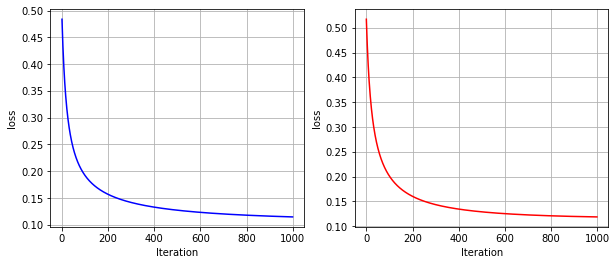

In [21]:
plot_learning_curve(clf_sc.loss, clf_sc.val_loss)

# 【問題7】決定領域の可視化

* 決定領域を可視化してください。

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

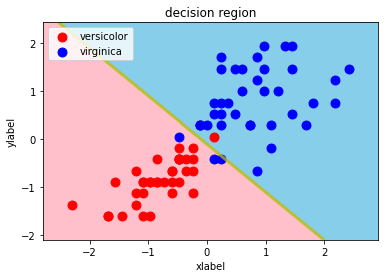

In [14]:
decision_region(X_train_std, y_train.reshape(75,), clf, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])

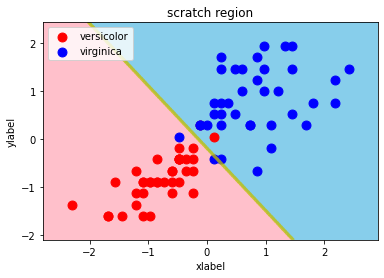

In [15]:
decision_region(X_train_std, y_train.reshape(75,), clf_sc, step=0.01, title='scratch region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica'])